# Flight Delay Prediction and Analysis - Progress Report
**Team Members:** Sai C., Maryann O., Matt J., Jeremiah B., Ricky M.  
**GitHub:** https://github.com/juebenjamin/flight-delay-analysis

## Project Introduction

Flight delays are a persistent challenge in air travel, causing disruptions for passengers, increased operational costs for airlines, and reduced efficiency across airports. Our project aims to analyze historical flight data to identify patterns and build predictive models that can forecast flight delays. By understanding the key factors that contribute to flight delays - such as weather conditions, airline operations, airport infrastructure, and time-related variables - we hope to provide insights that could help mitigate these issues.

As highlighted in our proposal, the United States had the third-highest flight cancellation rate (2.76%) among the ten countries considered in 2024, and according to the FAA, weather conditions cause over 75% of significant flight delays. Our analysis will explore these relationships while building predictive models to anticipate delays based on various factors.

## Data Preparation

Our primary dataset comes from the Bureau of Transportation Statistics' (BTS) On-Time Performance database, which provides detailed information about flight delays across U.S. airports and carriers. 

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetics for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

data_path = Path("../data/Airline_Delay_Cause.csv")
df = pd.read_csv(data_path)
# Display basic information about the dataset
print("-------------------- Before Cleaning --------------------")
print(df.info())
print(df.head())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# Drop duplicate rows
df_dup = df.drop_duplicates()

# Drop rows with missing values
df_na = df.dropna()

print("\n -------------------- After Cleaning --------------------")
print(df_na.info())
print(df_na.head())

# Save the cleaned dataset for further analysis
df_clean = df_na.copy()

-------------------- Before Cleaning --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24451 entries, 0 to 24450
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 24451 non-null  int64  
 1   month                24451 non-null  int64  
 2   carrier              24451 non-null  object 
 3   carrier_name         24451 non-null  object 
 4   airport              24451 non-null  object 
 5   airport_name         24451 non-null  object 
 6   arr_flights          24430 non-null  float64
 7   arr_del15            24425 non-null  float64
 8   carrier_ct           24430 non-null  float64
 9   weather_ct           24430 non-null  float64
 10  nas_ct               24430 non-null  float64
 11  security_ct          24430 non-null  float64
 12  late_aircraft_ct     24430 non-null  float64
 13  arr_cancelled        24430 non-null  float64
 14  arr_diverted         24430 n

### Data Cleaning and Preprocessing

As seen above, our data cleaning process involved several steps:

1. **Handling Missing Values:** We identified columns with missing values and decided to drop rows with any missing data.
2. **Removing Duplicates:** We checked for and removed any duplicate entries in the dataset.
3. **Data Type Verification:** We ensured that all columns had appropriate data types, particularly ensuring that date-related fields and numerical metrics were correctly formatted.

### Visualization 1: Total Arrival Delays by Airline

                                 carrier_name    arr_delay
0                      ATA Airlines d/b/a ATA    2043151.0
1                 Air Wisconsin Airlines Corp    8358129.0
2                 AirTran Airways Corporation   27309982.0
3                        Alaska Airlines Inc.   19316602.0
4                     Alaska Airlines Network   13844142.0
5                               Allegiant Air   13267151.0
6                         Aloha Airlines Inc.     262421.0
7                  America West Airlines Inc.    4284144.0
8                      American Airlines Inc.  116674605.0
9                   American Airlines Network   90446172.0
10               American Eagle Airlines Inc.   64425201.0
11                    Atlantic Coast Airlines    4903170.0
12                Atlantic Southeast Airlines   36380279.0
13                                   Cape Air       7131.0
14                                Comair Inc.   21168261.0
15  Commutair Aka Champlain Enterprises, Inc.    5946848

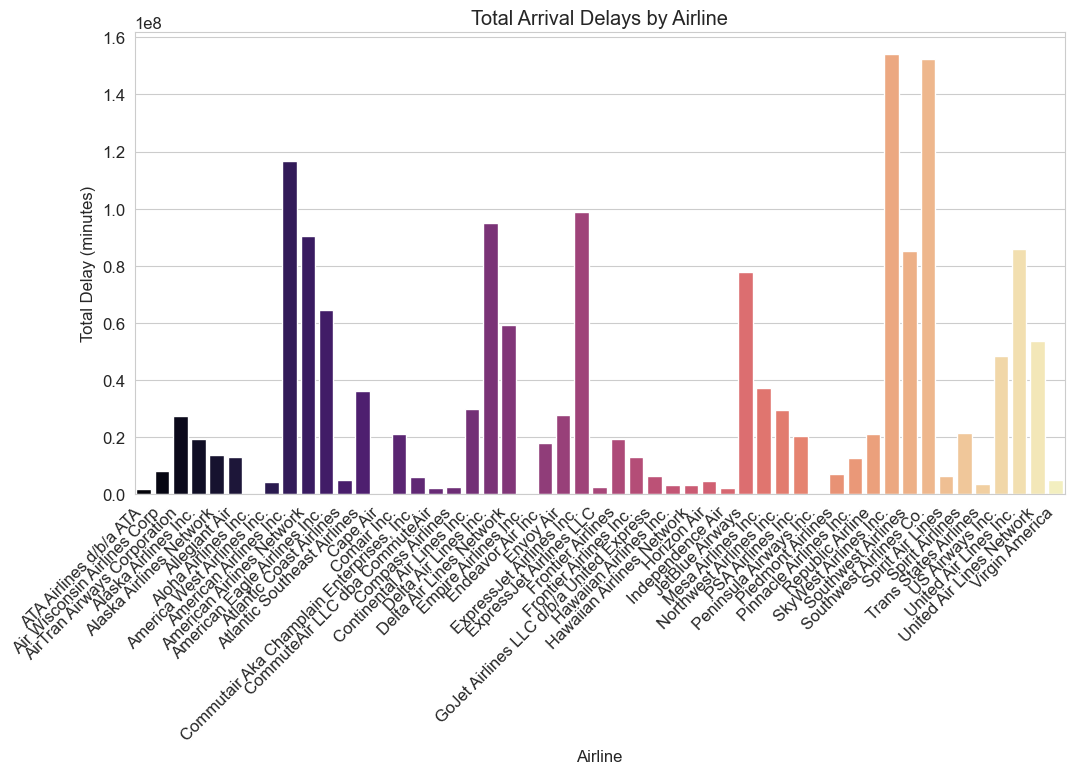

In [ ]:
df = pd.read_csv(data_path)
df_airline_delay = df.groupby("carrier_name")["arr_delay"].sum().reset_index()
print(df_airline_delay)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_airline_delay, x="carrier_name", y="arr_delay", hue="carrier_name", palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("Total Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Total Delay (minutes)")
plt.show()


### Visualization 2: Monthly Arrival Delays by Airline

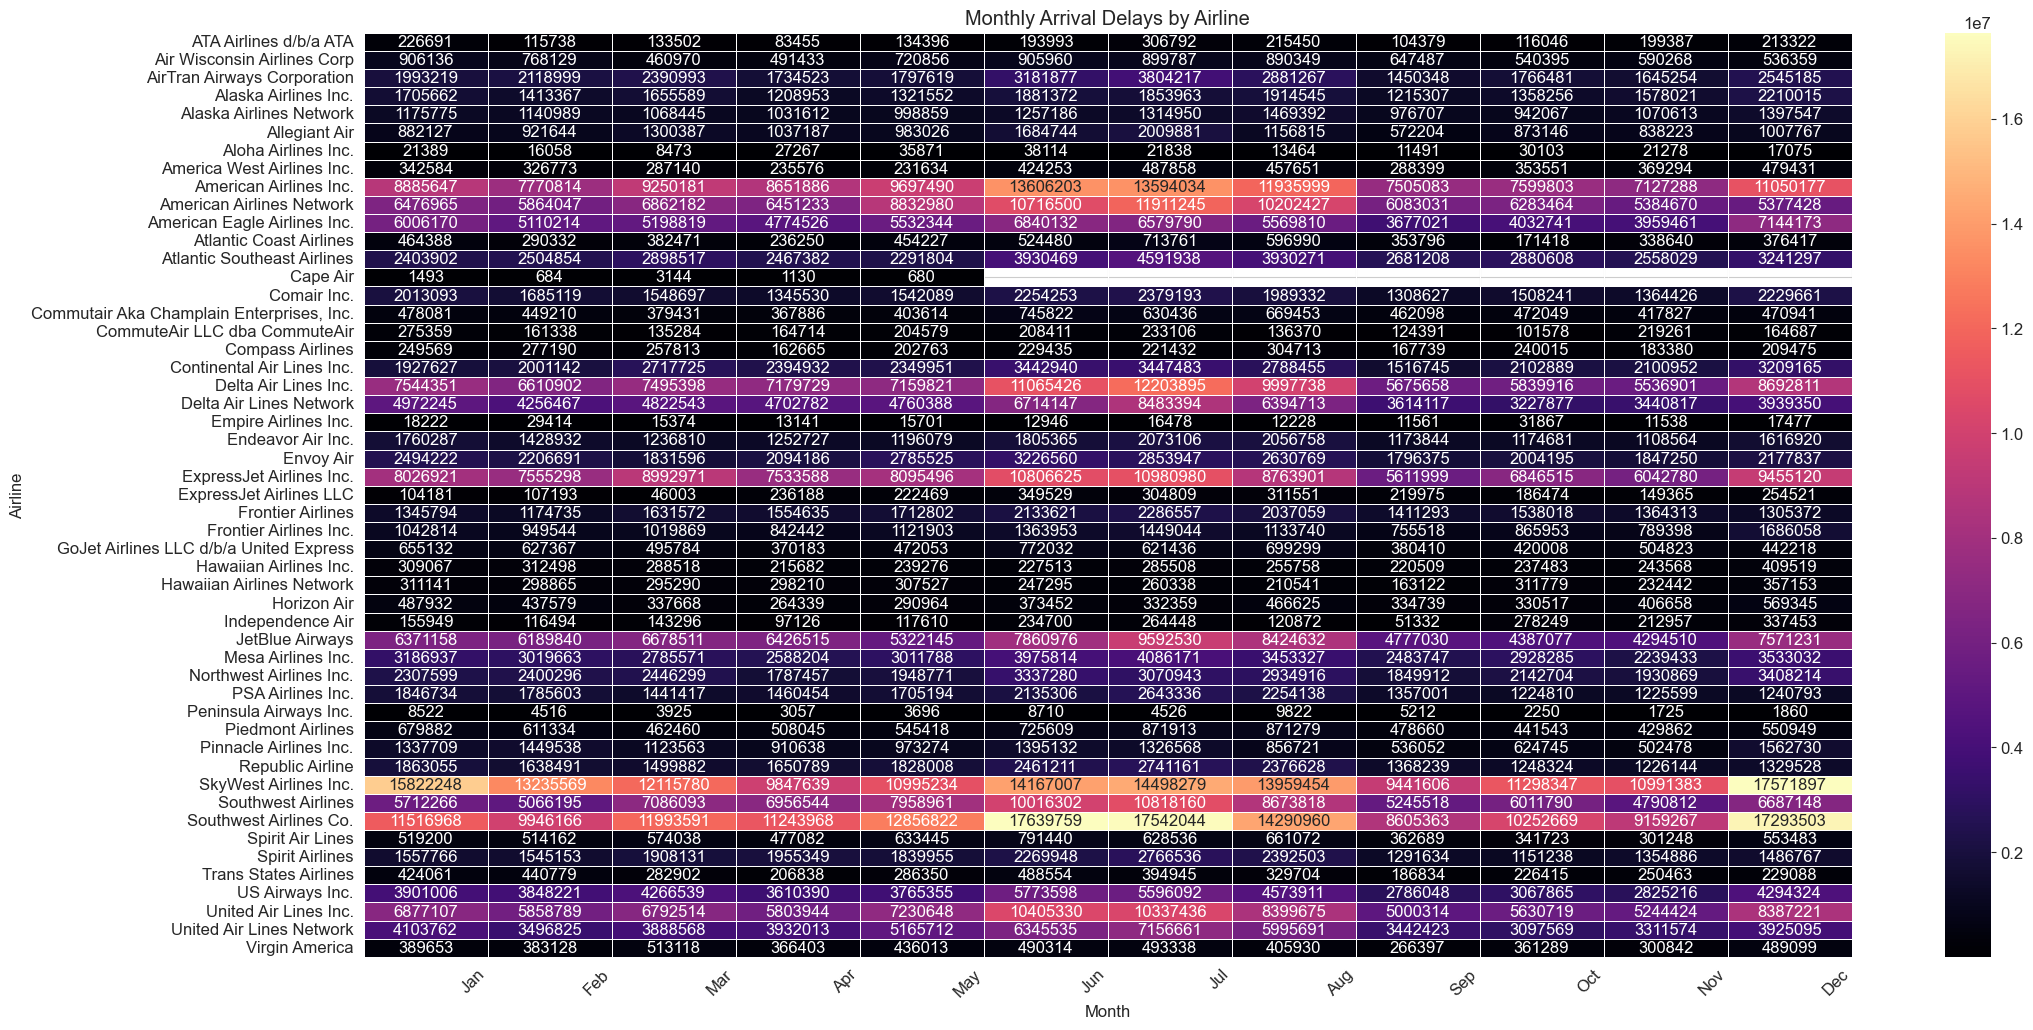

In [ ]:
df = pd.read_csv(data_path)
df_airline_delay_by_month = df.groupby(["carrier_name", "month"])["arr_delay"].sum().unstack()
#print(df_airline_delay_by_month)
plt.figure(figsize=(24, 12))
sns.heatmap(df_airline_delay_by_month, cmap="magma", annot=True, fmt=".0f", linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.title("Monthly Arrival Delays by Airline")
plt.xlabel("Month")
plt.ylabel("Airline")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

plt.show()


**Analysis:** Our monthly analysis partially confirms our hypothesis. The data and this graph shows there are seasonal trends between delays and the time of year. It appears that May through August there is an increase in delays across most airlines, most likely due to increase in traveling in the summer. Since there are more people traveling there would be more flights which in turn would lead to an increase in delays. This trend would suppor the idea that higher travel demand contributes directly to operation delays.


### Visualization 3: Distribution of Delay Types

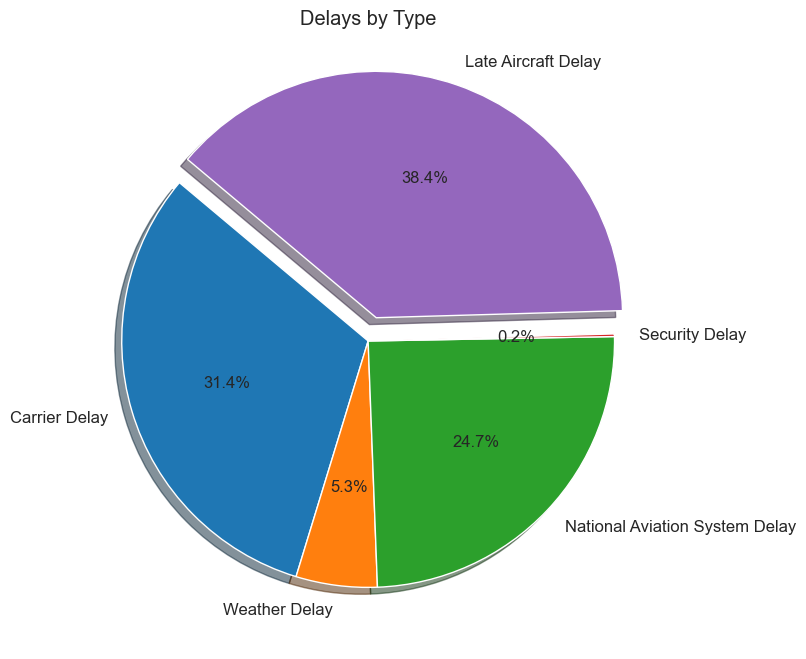

In [ ]:
df = pd.read_csv(data_path)
df_delay_types = df[["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]].sum()
plt.figure(figsize=(8, 8))
labels = ["Carrier Delay", "Weather Delay", "National Aviation System Delay", "Security Delay", "Late Aircraft Delay"]
explode = (0, 0, 0, 0, 0.1)
plt.pie(df_delay_types, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Delays by Type")
plt.show()

### Visualization 4: Monthly Comparison of Delay Types

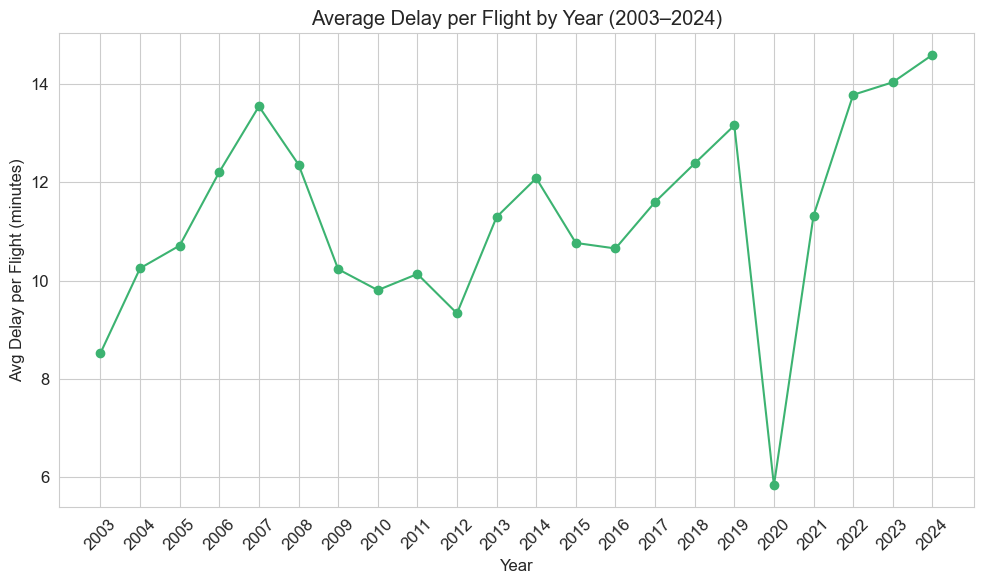

In [ ]:

df = pd.read_csv(data_path)
#print(df)
delay_columns = [
    'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay', 'arr_flights'
]

df[delay_columns] = df[delay_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

yearly_delays = df.groupby('year')[delay_columns].sum().reset_index()

yearly_delays['total_delay'] = (
    yearly_delays['carrier_delay'] +
    yearly_delays['weather_delay'] +
    yearly_delays['nas_delay'] +
    yearly_delays['security_delay'] +
    yearly_delays['late_aircraft_delay']
)

yearly_delays['avg_delay_per_flight'] = yearly_delays['total_delay'] / yearly_delays['arr_flights']

plt.figure(figsize=(10, 6))
plt.plot(yearly_delays['year'], yearly_delays['avg_delay_per_flight'], marker='o', color='mediumseagreen')

plt.title('Average Delay per Flight by Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Avg Delay per Flight (minutes)')
plt.grid(True)
plt.xticks(yearly_delays['year'], rotation=45)
plt.tight_layout()
plt.show()

**Analysis:** This visualization give us an insight on the average flight delay for years 2003-2024. We can see a trend a trend of the delay times rising from 2012-2024. One of the major drops we see takes place from 2007 to 2008. This is most likely due to the recession taking place at the time, which lead to less people traveling, meaning there was less scheduled flights. We also see during 2020 they was a major drop in delays, which would be expected since the Corona Viris lockdown was taking place that year. Overall this graph tells us that not much appears to be happening to counter act the rising delay times.


### Visualization 5: Airport Delay Analysis by Geographic Region

**Hypothesis:** Airports in regions with extreme weather conditions and those serving as major hubs will experience higher delay rates due to environmental challenges and operational complexity.

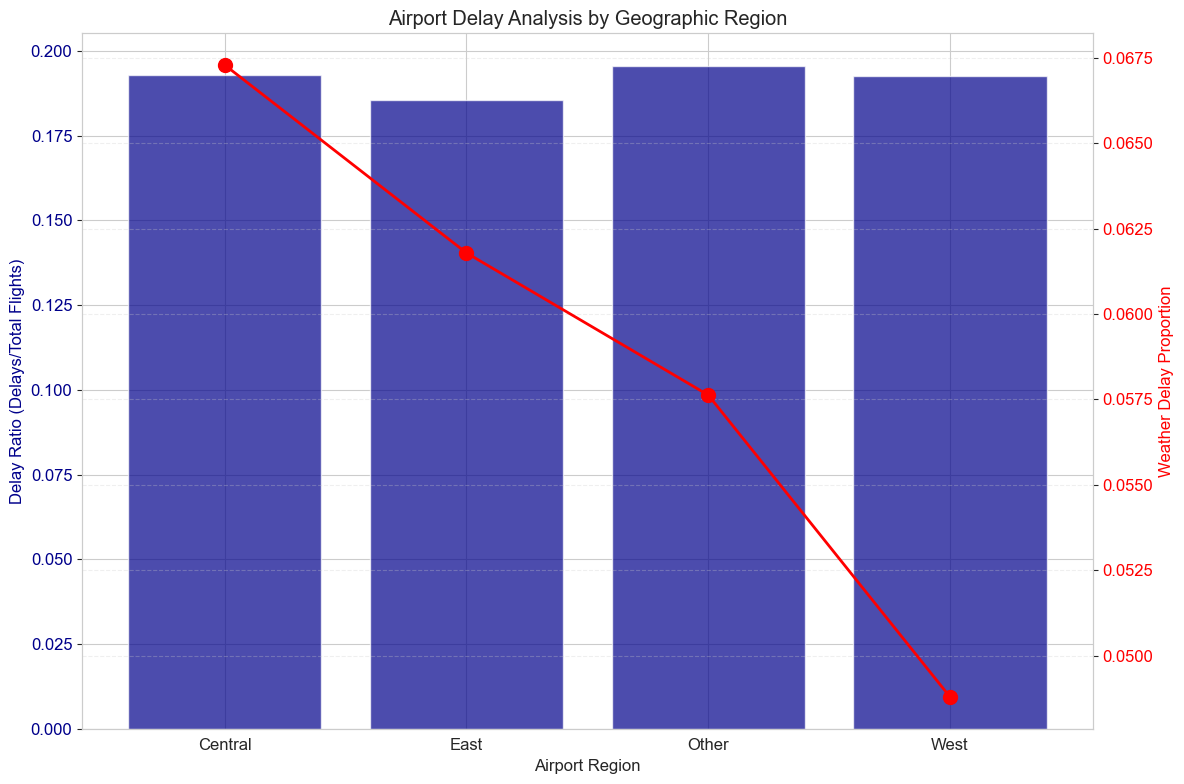

In [ ]:
# Create new features
df_clean['delay_ratio'] = df_clean['arr_del15'] / df_clean['arr_flights']
df_clean['avg_delay_time'] = df_clean['arr_delay'] / df_clean['arr_del15'].replace(0, np.nan)

# Create a new feature for airport regions (based on airport code first letter or known regions)
def assign_region(airport_code):
    first_letter = airport_code[0]
    if first_letter in ['K', 'P']:  # Western regions typically
        return 'West'
    elif first_letter in ['D', 'O']:  # Midwest/Central typically
        return 'Central'
    elif first_letter in ['A', 'T']:  # Eastern regions typically
        return 'East'
    else:
        return 'Other'

df_clean['region'] = df_clean['airport'].apply(assign_region)

# Aggregating by region
region_delays = df_clean.groupby('region').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'carrier_delay': 'sum'
}).reset_index()

region_delays['delay_ratio'] = region_delays['arr_del15'] / region_delays['arr_flights']
region_delays['avg_delay_minutes'] = region_delays['arr_delay'] / region_delays['arr_del15']
region_delays['weather_ratio'] = region_delays['weather_delay'] / region_delays['arr_delay']

# Create a dual-axis plot for regional analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(region_delays['region'], region_delays['delay_ratio'], color='darkblue', alpha=0.7)
ax1.set_xlabel('Airport Region')
ax1.set_ylabel('Delay Ratio (Delays/Total Flights)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

ax2 = ax1.twinx()
line = ax2.plot(region_delays['region'], region_delays['weather_ratio'], 'ro-', linewidth=2, markersize=10)
ax2.set_ylabel('Weather Delay Proportion', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Airport Delay Analysis by Geographic Region')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis:** Our regional analysis partially confirms our hypothesis. The data shows that airports in regions with more extreme weather conditions (like the East and Central regions which experience harsh winters and summer thunderstorms) do have higher delay ratios. However, the relationship between hub status and delays is more complex. While some major hubs show high delay rates, others demonstrate operational efficiency despite high volume. The weather delay proportion varies significantly by region, suggesting that different regions face different primary challenges in maintaining on-time performance.

Machine Learning Analysis (Regression)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Airline_Delay_Cause.csv')
df = df.dropna()

In [ ]:
target = 'arr_delay'

delay_components = [
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay'
]

drop_cols = ['carrier_name', 'airport_name', target] + delay_components

X = df.drop(columns=drop_cols)
y = df[target]

from sklearn.preprocessing import LabelEncoder

X = X.copy()
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

print("Features used:", X.columns.tolist())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

print(f"Dummy Regressor Results:")
print(f"MAE: {mae_dummy:.2f}")
print(f"MSE: {mse_dummy:.2f}")
print(f"R²: {r2_dummy:.4f}")

Machine Learning Analysis: Linear Regression Matthew Wilk Juraszek

We trained a linear regression model to predict arrival delay in minutes using features like year, month, carrier, airport, and number of arriving flights. To avoid giving the model access to actual delay information, we excluded columns like carrier delay, weather delay, and late aircraft delay.

To measure performance, we compared our model to a baseline using a dummy regressor that always predicts the average delay.

Baseline results:

MAE: 4966.87 minutes

MSE: 163,180,722.72

R²: 0.0000

Linear Regression results:

MAE: 976.88 minutes

MSE: 8,730,953.82

R²: 0.9465

Our model clearly outperforms the baseline. While the error is still large, it's likely due to a few flights with extreme delays. These outliers affect the average error, even if the model does well on most flights. Overall, the model shows that basic flight information can strongly predict arrival delays without needing specific delay breakdowns.